In [68]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
cwd=os.getcwd()


In [69]:
df=pd.read_csv(cwd+"\\titanic.csv")

In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [72]:
df.drop(['Name'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [73]:
df.shape

(891, 11)

In [74]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [75]:
df.drop(['Cabin'],axis=1,inplace=True)
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


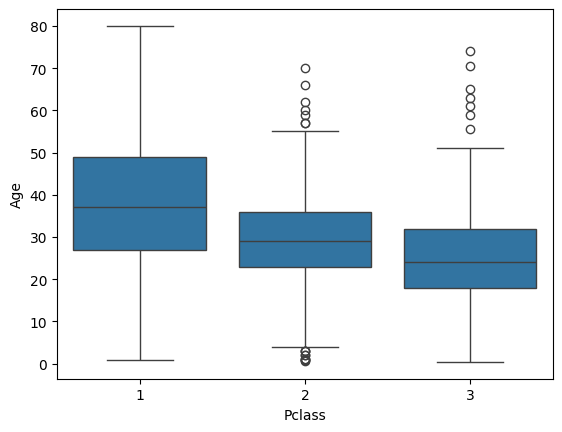

In [76]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.show()

In [77]:
#median age for pclass 1 is 38, 2 is 30, 3 is 25

def applymissing(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isna(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        elif pclass==3:
            return 25
    else:
        return age
        
df['Age']=df[['Age','Pclass']].apply(applymissing,axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [78]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [79]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [80]:
df['Embarked']=df['Embarked'].fillna('S')

In [81]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [82]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Count'>

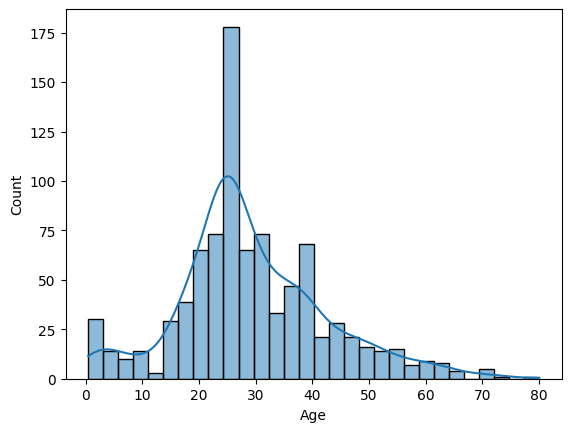

In [89]:
#univariate analysis
sns.histplot(data=df, x='Age', y=None, hue=None, bins=30, kde=True, palette=None)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

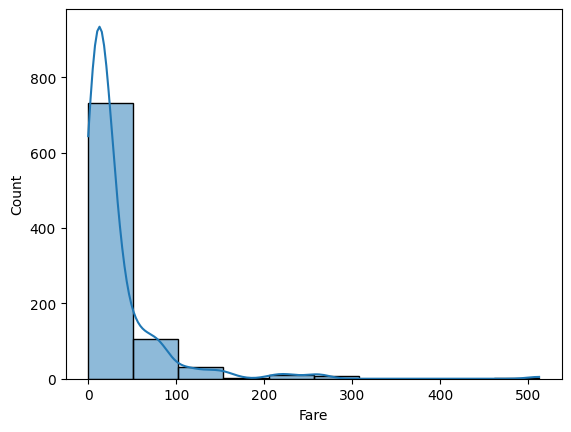

In [93]:
sns.histplot(data=df, x='Fare', y=None, hue=None, stat='count', bins=10, kde=True, palette=None)

C:\Users\emdd0\AppData\Local\Temp\ipykernel_8064\1735298652.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(x='Embarked', y=None, hue='Sex', data=df, order=None, hue_order=None, orient=None, color='r', palette=None, saturation=0.75, dodge=True, ax=None)


<AxesSubplot: xlabel='Embarked', ylabel='count'>

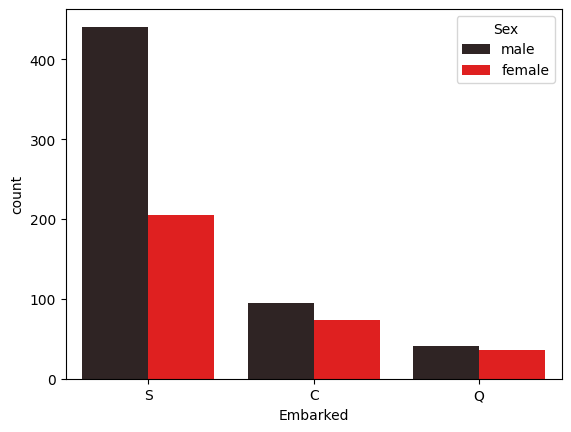

In [158]:
sns.countplot(x='Embarked', y=None, hue='Sex', data=df, order=None, hue_order=None, orient=None, color='r', palette=None, saturation=0.75, dodge=True, ax=None)


C:\Users\emdd0\AppData\Local\Temp\ipykernel_8064\536529199.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='plasma')


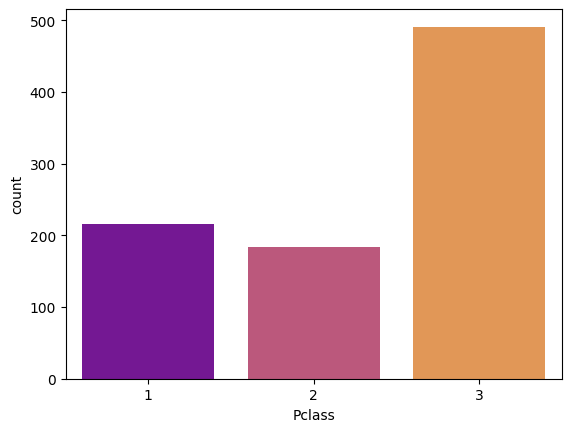

In [98]:
sns.countplot(x='Pclass', data=df, palette='plasma')
plt.show()

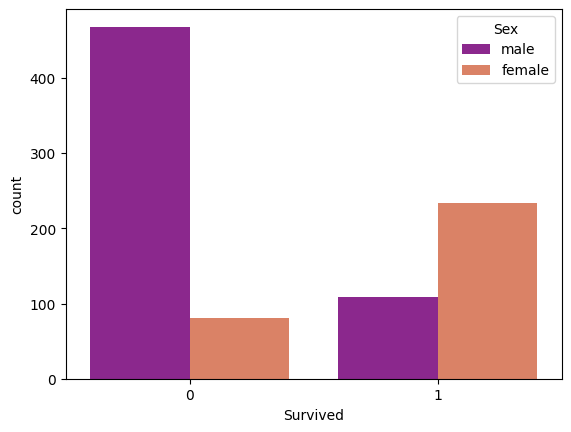

In [156]:
sns.countplot(x='Survived',hue='Sex', data=df, palette='plasma')
plt.show()

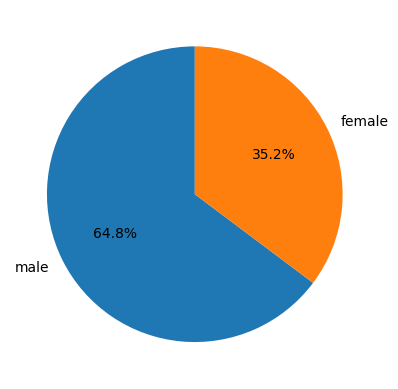

In [106]:
plt.pie(df['Sex'].value_counts(), labels=['male','female'], autopct='%1.1f%%', startangle=90)
plt.show()

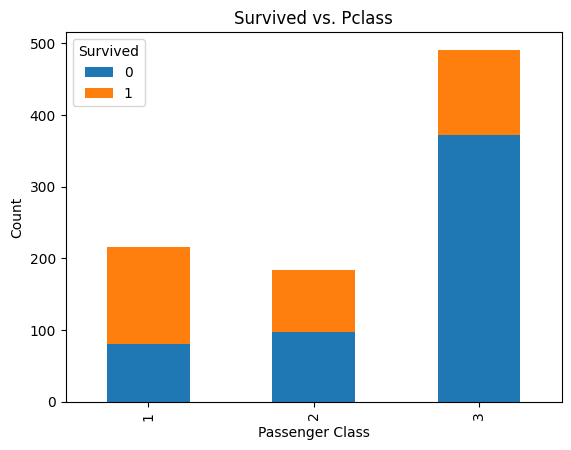

In [131]:
#bivariate analysis
group=df.groupby(['Pclass','Survived']).size().unstack(fill_value=0)
group.plot(kind='bar',stacked=True)
plt.title('Survived vs. Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

<AxesSubplot: xlabel='Age'>

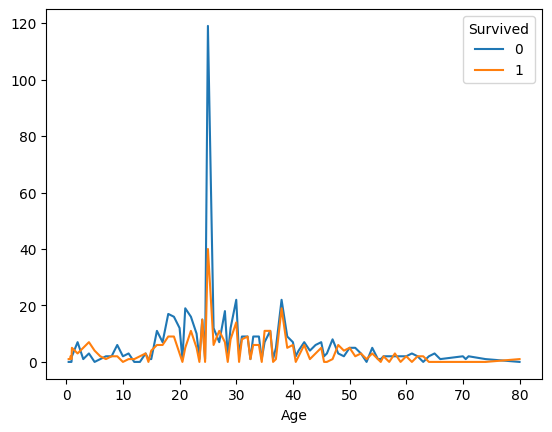

In [155]:
group1=df.groupby(['Age','Survived']).size().unstack(fill_value=0)
group1.plot(kind='line')

C:\Users\emdd0\AppData\Local\Temp\ipykernel_8064\1338184145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  r=df.corr()


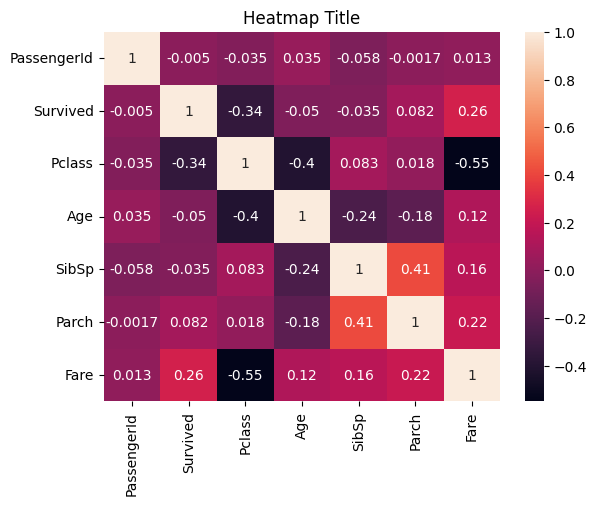

In [149]:
r=df.corr()
sns.heatmap(r,annot=True)
plt.title('Heatmap Title')
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Fare'>

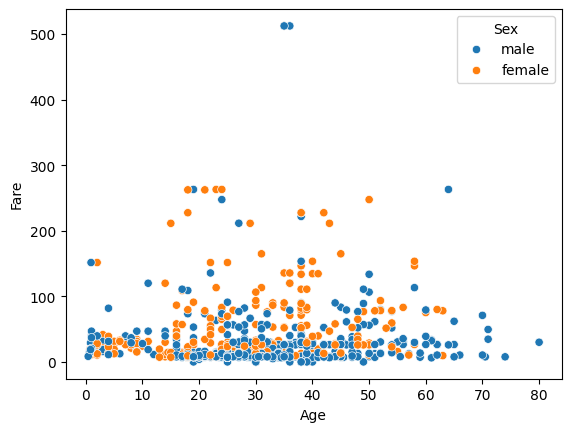

In [160]:
sns.scatterplot(x='Age', y='Fare', data=df,hue='Sex' )


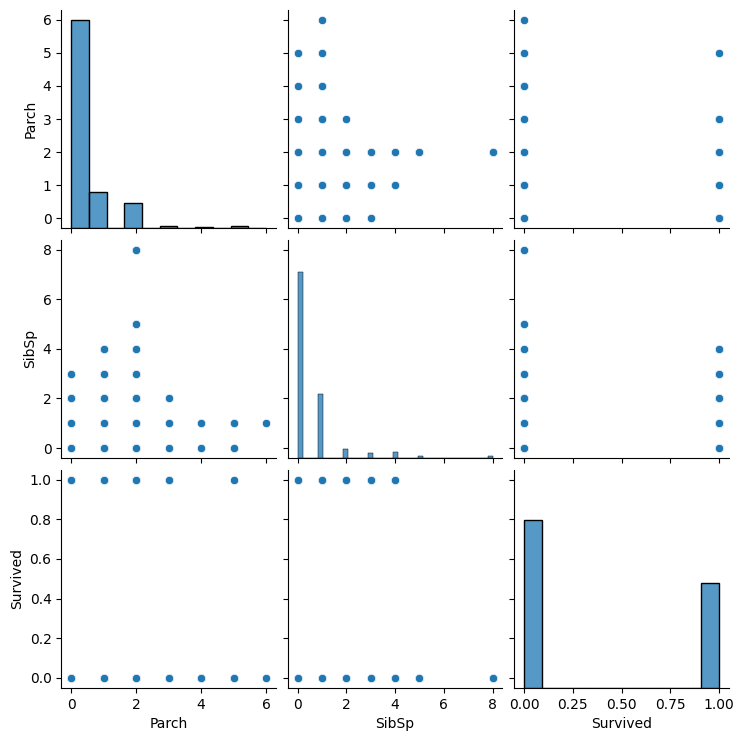

In [163]:
cols=['Parch','SibSp','Survived']
sns.pairplot(df[cols])